In [1]:
try: 
    import seaborn as sns
except:
    !pip install seaborn
    import seaborn as sns
try:
    import pymc as pm # For MCMC
except:
    !pip install pymc
    import pymc as pm
try:
    import arviz as az # For MCMC package
except:
    !pip install arviz
    import arviz as az
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
try:
    import corner
except:
    !pip install corner
    import corner

print(pm.__version__)

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


5.15.0


In [2]:
def dfg(a,b):
    file_path = 'datasets/Donor%d_CD%d_Genes.csv' %(a,b)
    all_df = pd.read_csv(file_path)
    file_path = 'datasets/mt_genes_metadata.csv'
    dfmeta = pd.read_csv(file_path)
    protein_coding_genes = dfmeta[dfmeta['gene_type'] == 'protein_coding']
    protein_names = protein_coding_genes['gene_name'].tolist()
    df2 = pd.DataFrame([all_df[i] for i in protein_names]).T
    return df2

In [21]:
def normiz_2(df,s_n = 1000):
    df1 = df
    listfinal = [sum(df.iloc[i]) for i in range(len(df))]
    for i in range(len(df)):
        df1.iloc[i] = df1.iloc[i]/listfinal[i] * s_n
    return df1

In [18]:
def lse(a,b):
    x = g_log(normiz_2(dfg(a,b)))[0]
    y = g_log(normiz_2(dfg(a,b)))[1]

    X = np.vstack([np.ones(len(x)), x]).T
    # theta = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    a, b = theta
    print(f"Estimated parameters: a = {a}, b = {b}")

    y_pred = a + b * x

    ss_total = np.sum((y - np.mean(y))**2)
    ss_residual = np.sum((y - y_pred)**2)
    r_squared = 1 - (ss_residual / ss_total)

    print(f"R-squared (R^2) value: {r_squared}")

    plt.scatter(x, y, label='Observed data')
    plt.plot(x, y_pred, color='red', label='Fitted line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Least Squares Estimation')
    plt.legend()
    plt.show()

In [19]:
def g_log(df_n):
    df_final = normiz_2(df_n).T
    gene_mean = [np.mean(df_final.iloc[i]) for i in range(13)]
    gene_var = [np.var(df_final.iloc[i]) for i in range(13)]
    log_gene_mean = np.log(gene_mean)
    log_gene_var = np.log(gene_var)
    return log_gene_mean, log_gene_var

def log_gene_plot(df_n):
    df_final = normiz_2(df_n).T
    gene_mean = [np.mean(df_final.iloc[i]) for i in range(13)]
    gene_var = [np.var(df_final.iloc[i]) for i in range(13)]
    log_gene_mean = np.log(gene_mean)
    log_gene_var = np.log(gene_var)
    plt.scatter(log_gene_mean,log_gene_var)

Estimated parameters: a = 1.9340102220340734, b = 1.0993566989318007
R-squared (R^2) value: 0.9670751161979677


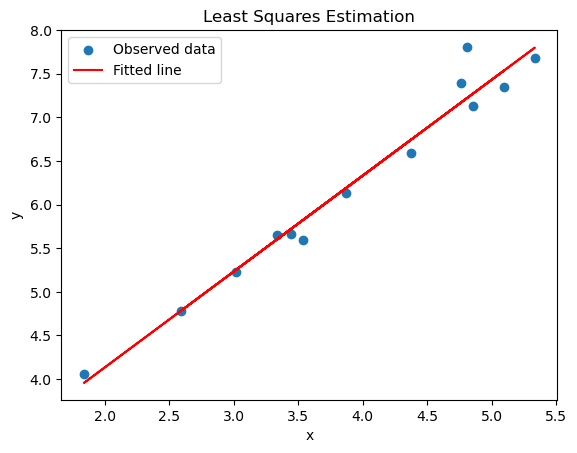

Estimated parameters: a = 2.71564094284695, b = 0.9203798659612552
R-squared (R^2) value: 0.9083683585262006


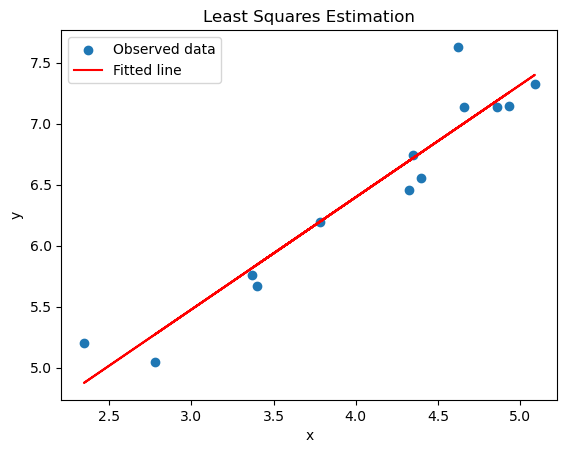

Estimated parameters: a = 1.6414409105513923, b = 1.1061489870280319
R-squared (R^2) value: 0.943518674975821


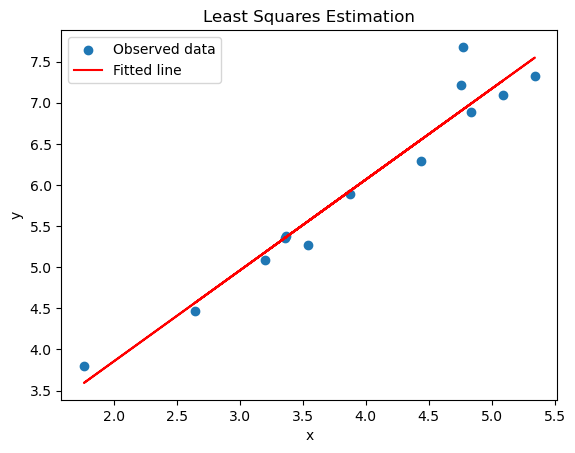

Estimated parameters: a = 2.169337034625318, b = 1.0196174509223594
R-squared (R^2) value: 0.8479417463804162


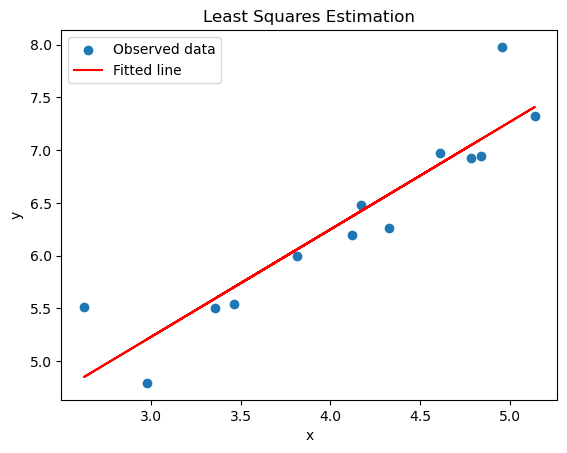

In [23]:
lse(1,4)
lse(2,4)
lse(1,8)
lse(2,8)


In [29]:
import scipy.stats as sd

In [28]:
normiz_2(dfg(1,4))

,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,51.948052,12.987013,99.567100,229.437229,147.186147,12.987013,164.502165,25.974026,86.580087,21.645022,30.303030,30.303030,86.580087
1,48.192771,24.096386,144.578313,210.843373,60.240964,12.048193,204.819277,18.072289,90.361446,42.168675,36.144578,6.024096,102.409639
2,52.238806,14.925373,119.402985,223.880597,59.701493,7.462687,141.791045,44.776119,149.253731,22.388060,52.238806,0.000000,111.940299
3,21.897810,14.598540,182.481752,167.883212,102.189781,36.496350,167.883212,14.598540,94.890511,29.197080,43.795620,21.897810,102.189781
4,63.829787,31.914894,63.829787,276.595745,148.936170,10.638298,117.021277,42.553191,148.936170,0.000000,21.276596,0.000000,74.468085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,50.000000,0.000000,250.000000,187.500000,137.500000,37.500000,137.500000,25.000000,62.500000,25.000000,37.500000,0.000000,50.000000
2884,17.699115,44.247788,115.044248,247.787611,106.194690,17.699115,159.292035,53.097345,123.893805,17.699115,17.699115,8.849558,70.796460
2885,46.296296,0.000000,92.592593,203.703704,120.370370,9.259259,129.629630,37.037037,55.555556,64.814815,46.296296,9.259259,185.185185
2886,25.316456,50.632911,151.898734,189.873418,80.168776,8.438819,168.776371,21.097046,84.388186,33.755274,29.535865,0.000000,156.118143


In [26]:
dfg(1,4)

,MT-ND1,MT-ND2,MT-CO1,MT-CO2,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
0,12,3,23,53,34,3,38,6,20,5,7,7,20
1,8,4,24,35,10,2,34,3,15,7,6,1,17
2,7,2,16,30,8,1,19,6,20,3,7,0,15
3,3,2,25,23,14,5,23,2,13,4,6,3,14
4,6,3,6,26,14,1,11,4,14,0,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,4,0,20,15,11,3,11,2,5,2,3,0,4
2884,2,5,13,28,12,2,18,6,14,2,2,1,8
2885,5,0,10,22,13,1,14,4,6,7,5,1,20
2886,6,12,36,45,19,2,40,5,20,8,7,0,37


In [27]:
sum(dfg(1,4).iloc[0]) 

231

In [30]:
x = g_log(normiz_2(dfg(1,4)))[0]
y = g_log(normiz_2(dfg(1,4)))[1]
tri = sd.linregress(x,y)

In [31]:
tri

LinregressResult(slope=1.0993566989318044, intercept=1.934010222034054, rvalue=0.9833997743532218, pvalue=1.6745917494404568e-09, stderr=0.06116096170544074, intercept_stderr=0.2473369843767211)